<h2>EXPLORATORY DATA ANALYSIS ON NATIONAL ACHIEVEMENTS <br>SURVEY USING DESCRIPTIVE STATISTICS<h2>

In [1]:
#importing libraries for Data Frames using Pandas and Numerical analysis using Python
import numpy as np
import pandas as pd

In [2]:
#importing libraries fro Data Visualization 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Reading CSV file from the System
df=pd.read_csv('nas-pupil-marks.csv')

In [4]:
#Display the top five data points in file 
df.head()

,STUID,State,District,Gender,Age,Category,Same language,Siblings,Handicap,Father edu,...,Express science views,Watch TV,Read magazine,Read a book,Play games,Help in household,Maths %,Reading %,Science %,Social %
0,11011001001,AP,1,1,3,3,1,5,2,1,...,3,3,4,3,4,4,20.37,NaN,27.78,NaN
1,11011001002,AP,1,2,3,4,2,5,2,2,...,3,4,4,3,4,4,12.96,NaN,38.18,NaN
2,11011001003,AP,1,2,3,4,2,5,2,1,...,3,4,3,3,4,4,27.78,70.00,NaN,NaN
3,11011001004,AP,1,2,3,3,2,4,2,1,...,3,4,3,3,4,4,NaN,56.67,NaN,36.00
4,11011001005,AP,1,2,3,3,2,5,2,1,...,3,2,3,3,4,4,NaN,NaN,14.55,8.33


In [5]:
#shape of the Data set
df.shape

(185348, 64)

In [6]:
#information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185348 entries, 0 to 185347
Data columns (total 64 columns):
STUID                     185348 non-null int64
State                     185348 non-null object
District                  185348 non-null int64
Gender                    185348 non-null int64
Age                       185348 non-null int64
Category                  185348 non-null int64
Same language             185348 non-null int64
Siblings                  185348 non-null int64
Handicap                  185348 non-null int64
Father edu                185348 non-null int64
Mother edu                185348 non-null int64
Father occupation         185348 non-null int64
Mother occupation         185348 non-null int64
Below poverty             185348 non-null int64
Use calculator            185348 non-null int64
Use computer              166186 non-null object
Use Internet              185348 non-null int64
Use dictionary            185348 non-null int64
Read other books       

<h7>Since the records of attributes maths,science,social,reading have almost 50% missing values filling these values with mean or average may lead to unfair instead of dropping let's transform and aggregate<h7>

In [7]:
#Read the columns in the Dataset
df.columns

Index(['STUID', 'State', 'District', 'Gender', 'Age', 'Category',
       'Same language', 'Siblings', 'Handicap', 'Father edu', 'Mother edu',
       'Father occupation', 'Mother occupation', 'Below poverty',
       'Use calculator', 'Use computer', 'Use Internet', 'Use dictionary',
       'Read other books', '# Books', 'Distance', 'Computer use',
       'Library use', 'Like school', 'Subjects', 'Give Lang HW',
       'Give Math HW', 'Give Scie HW', 'Give SoSc HW', 'Correct Lang HW',
       'Correct Math HW', 'Correct Scie HW', 'Correct SocS HW',
       'Help in Study', 'Private tuition', 'English is difficult',
       'Read English', 'Dictionary to learn', 'Answer English WB',
       'Answer English aloud', 'Maths is difficult', 'Solve Maths',
       'Solve Maths in groups', 'Draw geometry', 'Explain answers',
       'SocSci is difficult', 'Historical excursions', 'Participate in SocSci',
       'Small groups in SocSci', 'Express SocSci views',
       'Science is difficult', 'Observe e

<h7> cleaning the records and replacing with respective values it
means converting numerical data into categorical data <h7>

In [8]:
#Renaming the Abbreviated states using Dictionary
states={'AN':'Andaman & Nicobar','AP':'Andhra Pradesh','AR':'Arunachal Pradesh','BR':'Bihar','CG':'Chattisgarh','CH':'Chandigarh','DD':'Daman & Diu','DL':'Delhi','DN':'Dadra & Nagar Haveli','GA':'Goa','GJ':'Gujarat','HP':'Himachal Pradesh','HR':'Haryana','JH':'Jharkhand','JK':'Jammu & Kashmir','KA':'Karnataka','KL':'Kerala','MG':'Meghalaya','MH':'Maharashtra','MN':'Manipur','MP':'Madhya Pradesh','MZ':'Mizoram','NG':'Nagaland','OR':'Orissa','PB':'Punjab','PY':'Pondicherry','RJ':'Rajasthan','SK':'Sikkim','TN':'Tamil Nadu','TR':'Tripura','UK':'Uttarakhand','UP':'Uttar Pradesh','WB':'West Bengal'}

In [9]:
#mapping state names which are in abbreviated form
df['state'] = df['State'].map(states)

#### REPLACING NUMERICAL DATA WITH CATEGORICAL DATA

In [10]:
#Using the replace() Method to change type of Data for Better Understanding During Analysis
df['Gender'].replace([0,1,2],[np.nan,'Boy','Girl'],inplace=True)
df['Age'].replace([0,2,3,4,5,6,1],[np.nan,'12 years','13 years','14 years','15 years','16+ years','11- years'],inplace=True)
df['Father edu'].replace([5,1,0,2,3,4,],['Degree & above','Illiterate','Not applicable','Primary','Secondary','Sr secondary'],inplace=True)
df['Mother edu'].replace([5,1,0,2,3,4,],['Degree & above','Illiterate','Not applicable','Primary','Secondary','Sr secondary'],inplace=True)
df['Father occupation'].replace([4,0,3,2,8,6,5,7,1],['Clerk','Do not know','Farmer','Labourer','Professional','Business','Skilled Worker','Teacher/Lecturer','Unemployed'],inplace=True)
df['Mother occupation'].replace([4,0,3,2,8,6,5,7,1],['Clerk','Do not know','Farmer','Labourer','Professional','Business','Skilled Worker','Teacher/Lecturer','Unemployed'],inplace=True)
df['Below poverty'].replace([0,1,2],['Dont know','No','Yes'],inplace=True)
df['Use calculator'].replace([0,1,2],[np.nan,'No','Yes'],inplace=True)
df['Use dictionary'].replace([0,1,2],[np.nan,'No','Yes'],inplace=True)
df['Read other books'].replace([0,1,2],[np.nan,'No','Yes'],inplace=True)
df['# Books'].replace([3,2,4,1],['11-25 books','1-10 books','25+ books','No books'],inplace=True)
df['Distance'].replace([0,2,3,4,1],[np.nan,'1-3 km','3-5 km','More than 5 km','Up to 1 km'],inplace=True)
df['Computer use'].replace([0,5,1,4,3,2],[np.nan,'Daily','No computer','Once in a week','Once in month','Never use'],inplace=True)
df['Library use'].replace([0,5,1,4,3,2],[np.nan,'More than once in a week','No library','Once in a week','Once or twice in a month','Never use'],inplace=True)
df['Private tuition'].replace([0,1,2],[np.nan,'No','Yes'],inplace=True)
df['Watch TV'].replace([0,4,1,2,3],[np.nan,'Every day','Never','Once a month','Once a week'],inplace=True)
df['Read magazine'].replace([0,4,1,2,3],[np.nan,'Every day','Never','Once a month','Once a week'],inplace=True)
df['Read a book'].replace([0,4,1,2,3],[np.nan,'Every day','Never','Once a month','Once a week'],inplace=True)
df['Play games'].replace([0,4,1,2,3],[np.nan,'Every day','Never','Once a month','Once a week'],inplace=True)
df['Help in household'].replace([0,4,1,2,3],[np.nan,'Every day','Never','Once a month','Once a week'],inplace=True)
df['Siblings'].replace([2,3,4,5],['single child','1 sibling','2siblings','3 siblings'],inplace=True)

In [11]:
df['Total']=df[['Social %','Science %','Maths %','Reading %']].mean(axis=1)

In [12]:
# Let's See that Data Whether the code is reflected or not
df.head(3)

,STUID,State,District,Gender,Age,Category,Same language,Siblings,Handicap,Father edu,...,Read magazine,Read a book,Play games,Help in household,Maths %,Reading %,Science %,Social %,state,Total
0,11011001001,AP,1,Boy,13 years,3,1,3 siblings,2,Illiterate,...,Every day,Once a week,Every day,Every day,20.37,NaN,27.78,NaN,Andhra Pradesh,24.075
1,11011001002,AP,1,Girl,13 years,4,2,3 siblings,2,Primary,...,Every day,Once a week,Every day,Every day,12.96,NaN,38.18,NaN,Andhra Pradesh,25.570
2,11011001003,AP,1,Girl,13 years,4,2,3 siblings,2,Illiterate,...,Once a week,Once a week,Every day,Every day,27.78,70.0,NaN,NaN,Andhra Pradesh,48.890


<h1>1.WHAT INFLUENCES STUDENTS PERFORMANCE THE MOST ?<h1>

<h7>1.To answer the question we need to aggregate the dataset on marks in different subjects with the factors(attributes) and calculate  the difference  of the maximum and minimum marks based on particular factor that influences child  on each subject and visualize using heatmap,finally merge all the individual marks of sujbject based on particular factor(attribute)<h7>


In [13]:
def input(list):
        x= df.groupby(list)['Maths %','Science %','Reading %','Social %','Total'].mean()
        y=pd.DataFrame(x.max()-x.min(),columns=['performance'])
        fig,axs=plt.subplots(ncols=2,figsize=(16,4))
        sns.heatmap(data=x,annot=True,fmt='.1f',ax=axs[0])
        sns.heatmap(data=y,annot=True,fmt='.1f',ax=axs[1])


In [14]:
factors=['Gender', 'Age', 'Siblings','Father edu',
       'Father occupation', 'Mother occupation', 'Below poverty',
       'Use calculator','Use dictionary',
       'Read other books', '# Books', 'Distance', 'Computer use',
       'Library use',  'Private tuition','Mother edu', 'Watch TV',
       'Read magazine', 'Read a book', 'Play games', 'Help in household']

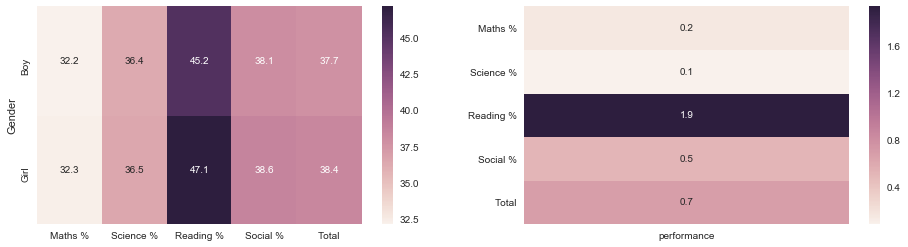

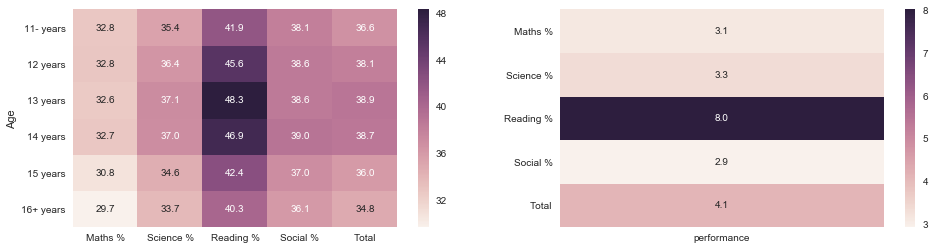

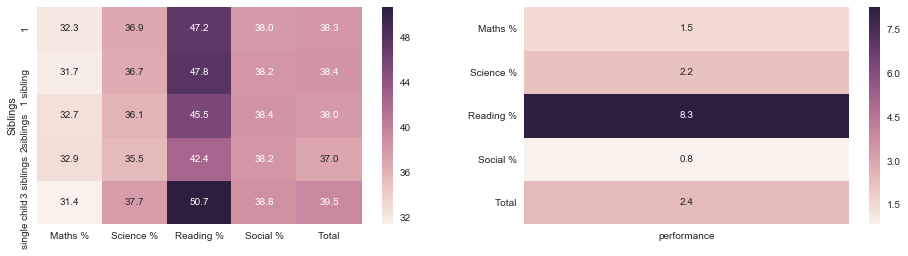

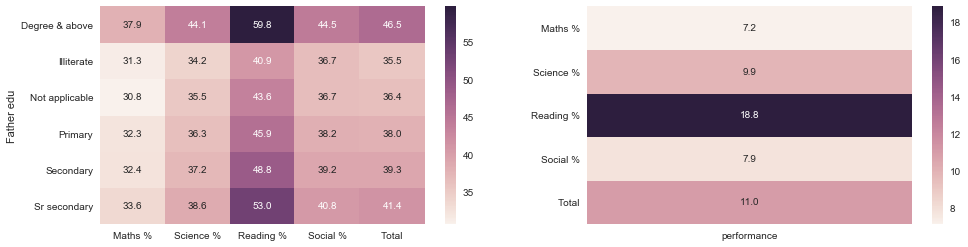

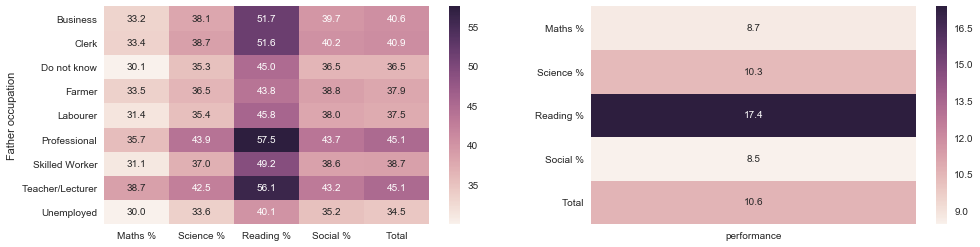

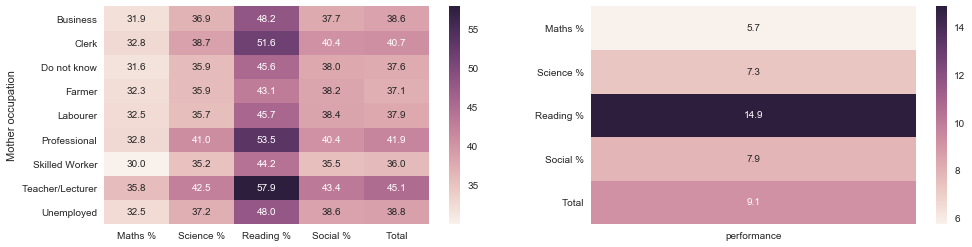

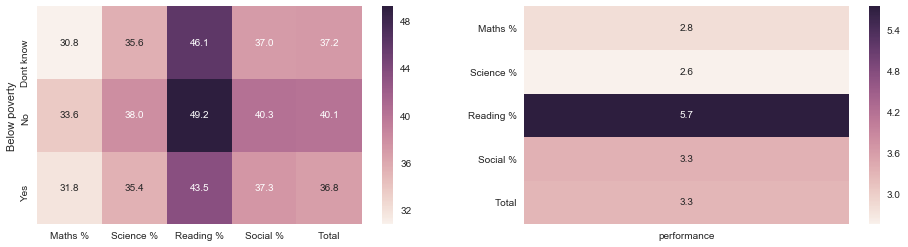

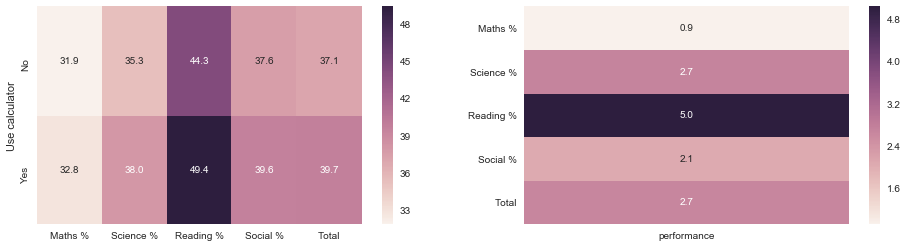

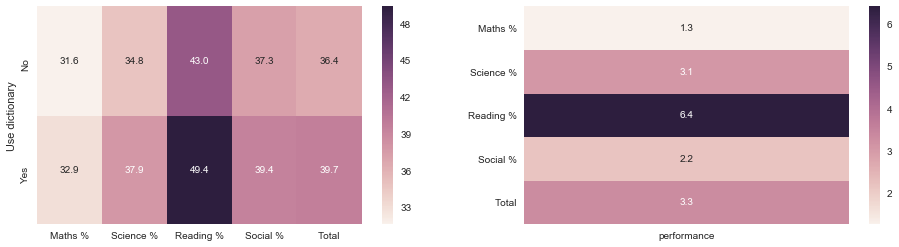

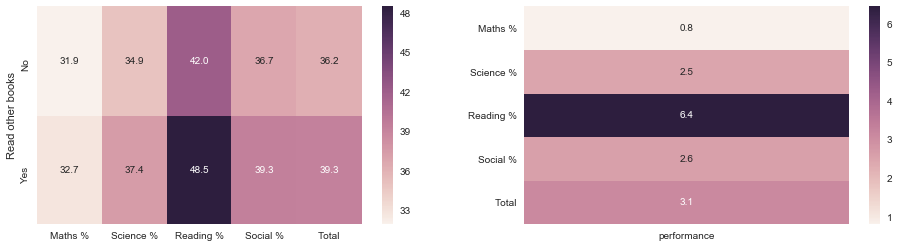

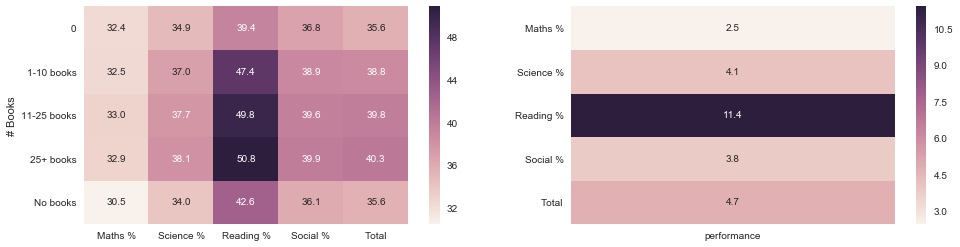

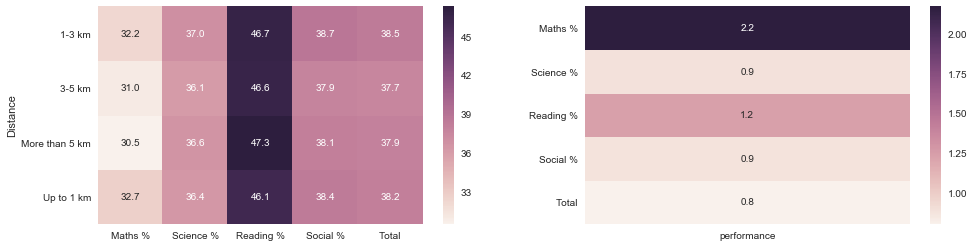

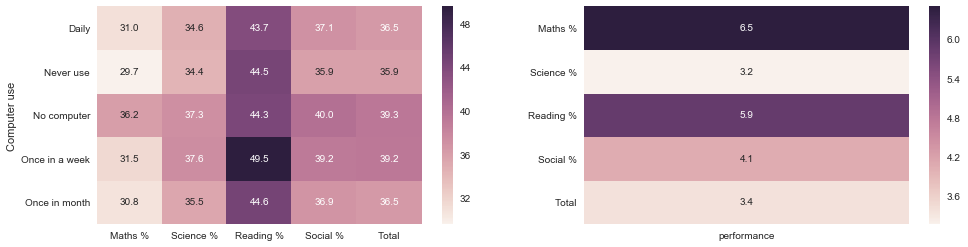

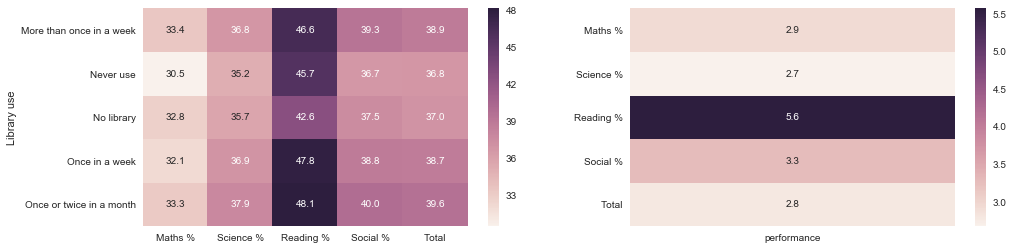

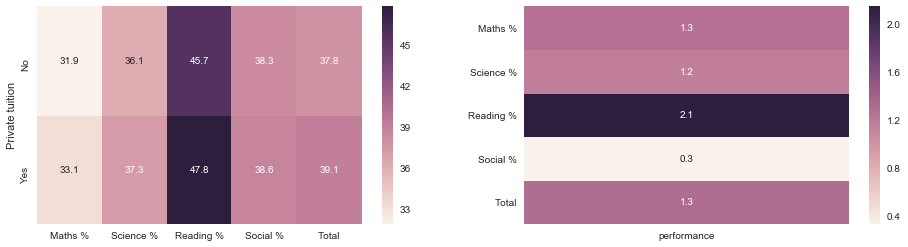

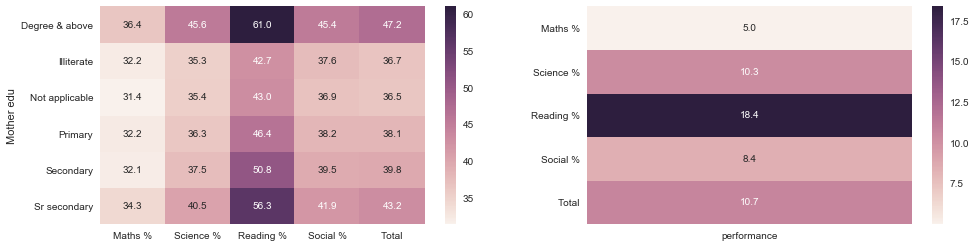

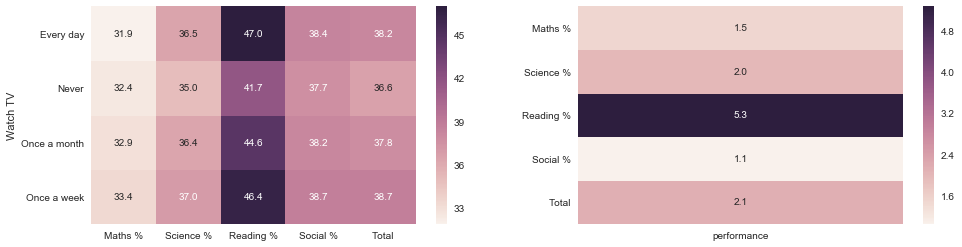

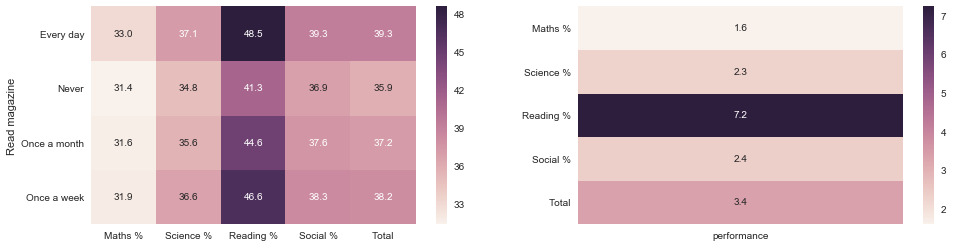

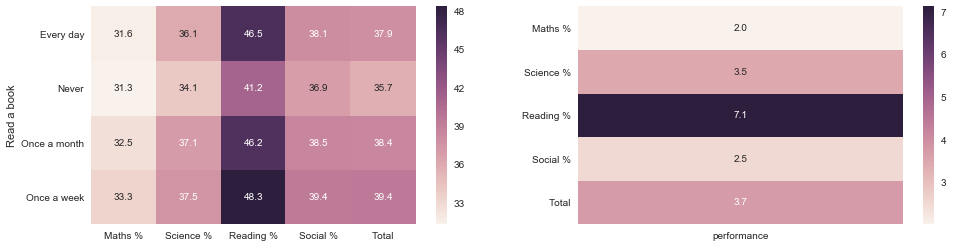

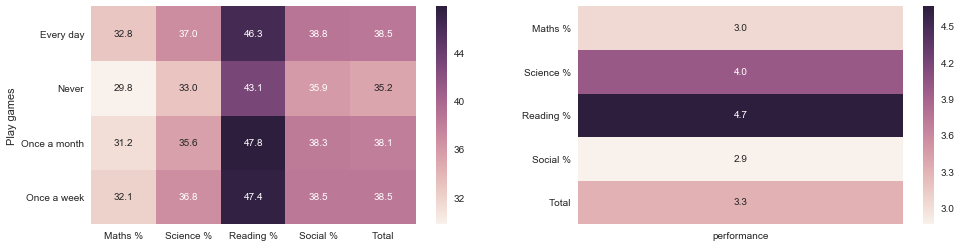

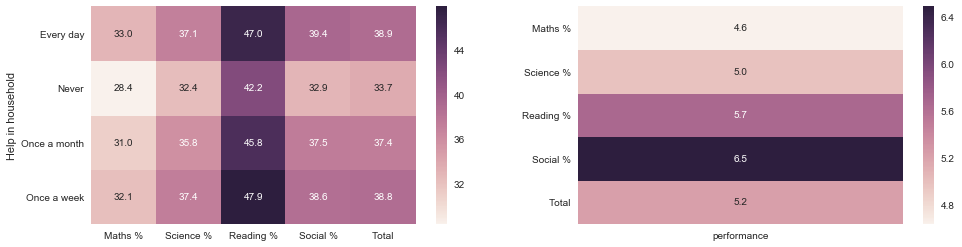

In [15]:
for i in factors:
    input(i)

<h4>SOME INTERESTING OBSERVATIONS FROM THE ABOVE VISUALIZATIONS<h2>

<h7>These above  visualizations are based on 185,348 students across india:<br>
The heat map sumamrize the scores obtained for each feature based on different target variable: reading, science, social, maths and overall performance(total marks) with prominent features shaded in darker color.to evaluate the relative importance of factors,to quatify the overall student performance, we included an additional feature ‘performance’ = difference in average of maximum marks and minimum marks in(‘maths %’, ‘reading %’, ‘science %’, ‘social %’,‘total %’).<H7>



### Factors that infuence the class VIII students are:
|Factor |Performance|
|--|-------------------------------|
|Father Edu|11.0 % improvement|
|Father Occupation|10.6 % improvement|
|Mother Edu|10.7 %improvement|
|Mother Occupation|9.1 %improvement|
|Help in Household|5.2 %improvement|

### Factors influences on subjects
|Subject |Top Factors|
|--|-------------------------------|
|Maths |Father occupation, Father edu, Computer use, Mother occupation|
|Science| Father occupation, Mother edu, Father edu, Mother occupation|
|Reading| Father edu, Mother edu, Father occupation, Mother occupation|
|Social| Father occupation, Mother occupation, Father edu, Mother edu|
<H7>This concludeds that the education of parents were the most decisive predictor in deciding a student's performance. Among top features, 'Father edu' has distinctly higher scores for performance<H7>

<h1>2.HOW BOYS AND GIRLS PERFORM ACCROSS THE STATES ?<h1>

<h3>BOYS PERFORMANCE ACCROSS STATES<h3>

Axes(0.125,0.125;0.775x0.755)


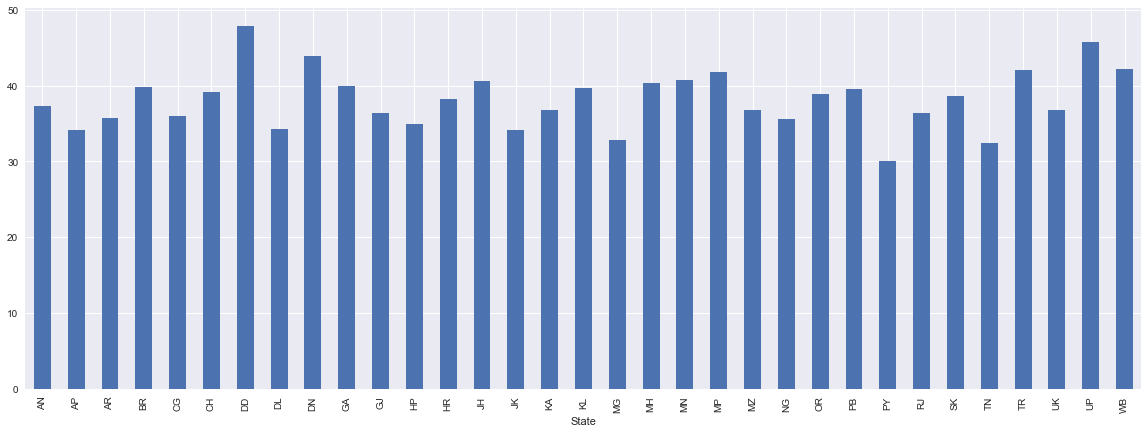

In [16]:
Boy=df[df['Gender']=='Boy']
Boy_performance=Boy.groupby(['State'])['Total'].mean()
print(Boy_performance.plot(kind='bar',figsize=(20,7)))

<h7>we can see from the graph that boys performed best in  Damman & Diu,Uttar pradesh and worst in Pondicherry,Tamilnadu and Meghalaya<h7>

<h3>GIRLS PERFORMANCE ACCROSS STATES<h3>

Axes(0.125,0.125;0.775x0.755)


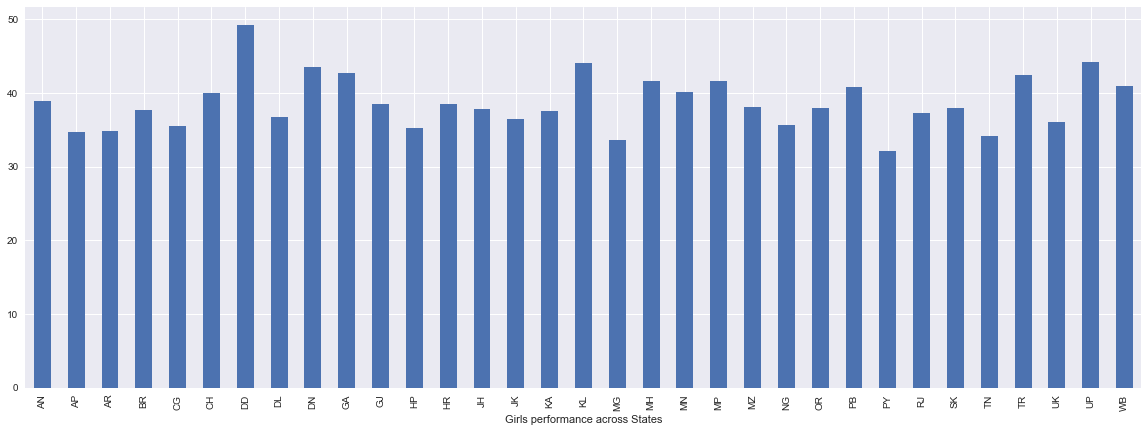

In [17]:
Girl=df[df['Gender']=='Girl']
Girl_performance=Girl.groupby(['State'])['Total'].mean()
print(Girl_performance.plot(kind='bar',figsize=(20,7)))
plt.xlabel("Girls performance across States")

<h7>we can see from the graph that girls performed best in  Damman & iu,uttar pradesh,kerala,dadra and nagar haveli  and worst in pondicherry,tamilnadu and Meghalaya<h7>

<h3>NOW FIND THE DIFFERENCE TO KNOW WHO SCORE THE BEST AMONG STATES<h3>

In [18]:
difference=Boy_performance-Girl_performance

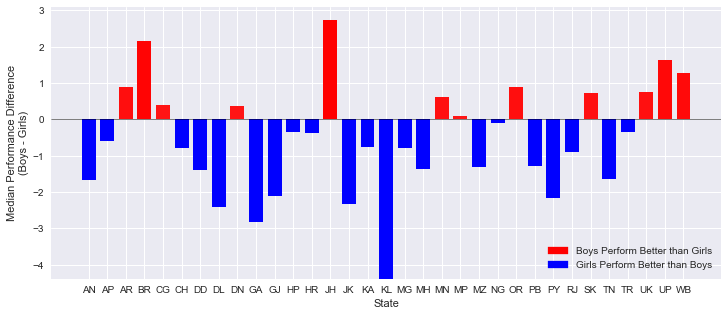

In [19]:
#print(difference.plot(kind='bar',figsize=(20,7)))
import matplotlib.colors as colors
from matplotlib.cm import bwr as cmap
import matplotlib.patches as mpatches
plt.figure(figsize=(12,5))

# setting colors. Maps the max and min values in "diff" to a color map bwr
c_normal = colors.PowerNorm(.1,vmin=min(difference), vmax=max(difference))
_COLORS = cmap(c_normal(difference))

plt.bar(np.arange(len(difference)), 
        height = difference, width = 0.75, align = "center",\
        color=_COLORS)
plt.xticks(np.arange(len(difference.index)),list(difference.index))
plt.axhline(0, color='k', linewidth = 0.5)
plt.xlabel("State")
plt.ylabel("Median Performance Difference\n(Boys - Girls)")

# creating legend patches
red_patch = mpatches.Patch(color='red', label='Boys Perform Better than Girls')
blue_patch = mpatches.Patch(color='blue', label='Girls Perform Better than Boys')
plt.legend(handles=[red_patch, blue_patch], loc=4)



<h7>the figure shown above sumamrizes the data based on gender difference. we used two axes for representing data for each state <h7>
<h7>1.Girls performed well in the states of kerala and delhi and goa when compared to Boys<h7> 
<h7>2.Boys performed well in the states of jharkand and bihar when compared to Girls<h7> 

<h1>3.DOES STUDENTS FROM SOUTH INDIAN STATES REALLY EXCEL AT MATHS AND SCIENCE ?<h1>

In [20]:
#Create dictionary to map south states Based on Particular State
South_states={'AN':'Rest of country','AP':'Andhra Pradesh','AR':'Rest of country','BR':'Rest of country','CG':'Rest of country','CH':'Rest of country','DD':'Rest of country','DL':'Rest of country','DN':'Rest of country','GA':'Rest of country','GJ':'Rest of country','HP':'Rest of country','HR':'Rest of country','JH':'Rest of country','JK':'Rest of country','KA':'Karnataka','KL':'Kerala','MG':'Rest of country','MH':'Rest of country','MN':'Rest of country','MP':'Rest of country','MZ':'Rest of country','NG':'Rest of country','OR':'Rest of country','PB':'Rest of country','PY':'Rest of country','RJ':'Rest of country','SK':'Rest of country','TN':'Tamilnadu','TR':'Rest of country','UK':'Rest of country','UP':'Rest of country','WB':'Rest of country'}

In [21]:
#creating a new column Zone in the Data Frame
df['SOUTH'] = df['State'].map(South_states)

Axes(0.125,0.125;0.775x0.755)


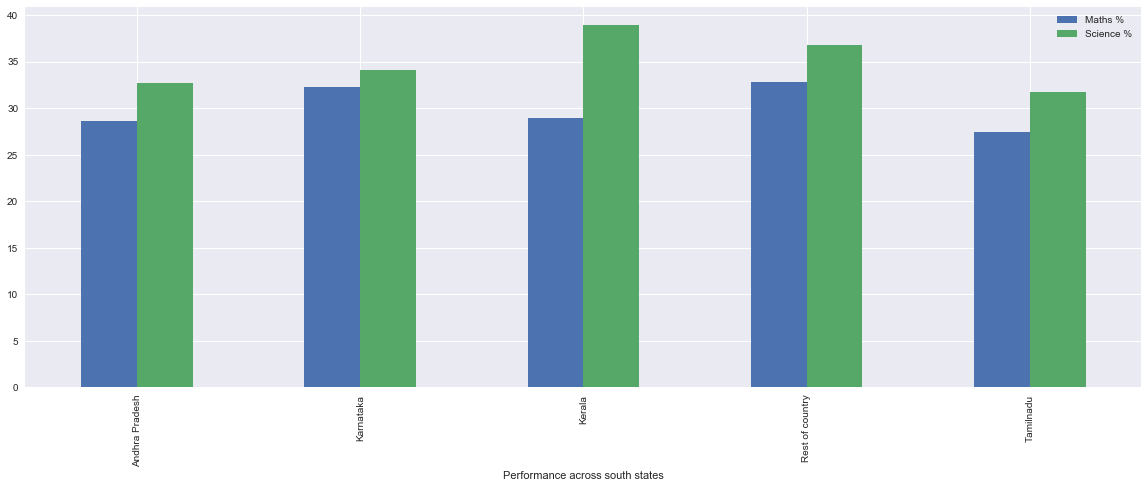

In [22]:
south_performance=df.groupby(['SOUTH'])['Maths %','Science %'].mean()
print(south_performance.plot(kind='bar',figsize=(20,7)))
plt.xlabel("Performance across south states")

<H7>Kerala was an exception among southern states with higher median score than other southern states as well as the rest of the country in Science and Karnataka was also exception in maths compared to other states and rest of the country<h7>


### south states Performance in Science:
|State |Rank|
|--|-------------------------------|
|Kerala|1|
|Karnataka|2|
|Andhra pradesh|3|
|Tamilnadu|4|



### south states Performance in Maths:
|State |Rank|
|--|-------------------------------|
|Karnataka|1|
|Kerala|2|
|Andhra pradesh|3|
|Tamilnadu|4|

## Bonus analysis 

<br>
<br>

# 4.DOES WATCHING TV REFLECT ON MARKS WITH RESPECT TO AGE?
<br>
<br>

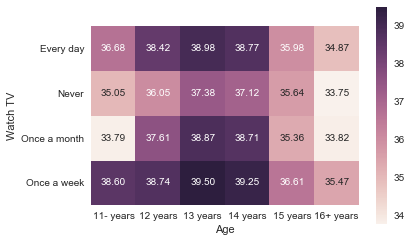

In [23]:
j=pd.crosstab(index=df['Watch TV'], columns=df['Age'], values=df['Total'], aggfunc='mean')
fig=plt.figsize=()
sns.heatmap(data=j,annot=True,fmt='.2f',square=True)


<h7>Watching TV reflects students marks with age above 14 years. The best insight in this analysis is student who Never watch TV <br>also reflects students total score. This concludes that students above 14 years who watch TV did not performed well compared to<br> other age groups<h7>

<br>
<br>
# 5.WHICH QUALIFICATION OF PARENTS INFLUENCE THE CHILD TO SCORE MORE ?
<br>
<br>

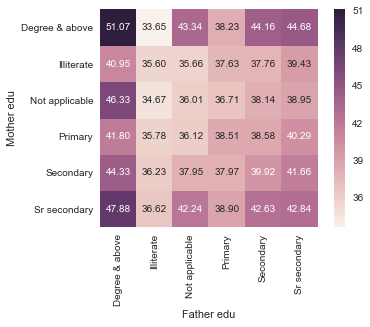

In [24]:
j=pd.crosstab(index=df['Mother edu'], columns=df['Father edu'], values=df['Total'], aggfunc='mean')
fig=plt.figsize=()
sns.heatmap(data=j,annot=True,fmt='.2f',square=True)
   

<h7>Student with Both parents eduaction is Degree and above scored better compared to others. Mother education alone doesn't 
influence student score more as if we can observe the above heatmap. Student with mother education(Degree & above) and 
Father education(Illiterate) don't have the better results when compared to others<h7>